---

# 1. 综述

## 1.1 引言

机器学习按照学习模式分类，可分为监督学习，非监督学习以及强化学习。

监督学习一般需要一定数量的带标签的数据。在很多的应用场景中，通过人工标注的方式来给数据打标签往往行不通。比如我们通过监督学习来训练一个模型可以自动下围棋，就需要将当前棋盘的状态作为输入数据，其对应的最佳落子位置作为标签。训练一个好的模型就需要收集大量的不同棋盘状态以及对应动作。这种做法实践起来比较困难，有两个原因：一是对于每一种棋盘状态，即使是专家也很难给出“正确”的动作，二是获取大量数据的成本往往比较高。对于下棋这类任务，虽然我们很难知道每一步的“正确”动作，但是其最后的结果赢输却很容易判断。因此，如果可以通过大量的模拟数据，通过最后的结果（奖励）来倒推每一步棋的好坏，从而学习出“最佳”的下棋策略，这就是强化学习的思想----用一个延迟的奖励，来回溯之前的动作是否有长期的合理性。



强化学习是计算机模拟人类学习的方法，为机器学习提供了最好的范例。

人类学习的过程是通过不断实践来积累经验。实践之初，人类能够分析所处的场景，也能够列出在给定场景下所能够选择执行方法。通过长时间的实践，人类经过一次次试错并从错误中得到教训，用以改进所处相同场景中的处理方法，以期下次遇到同样情况时，最初更优化的选择。经年累月，人类得出了在某个场景下应该采取的最优处理方法。例如，梅雨季节带把伞；开汽车过十字路口时，减速能够减少事故发生的概率......通过经验来学习，并积累经验，再次遇到相同问题时，在经验的帮助下做出最合理的决策。同时，经验也得到再次积累。

在大数据时代，我们已经可以通过数据集将过去的所有场景进行代币化（tokenization，就是将场景中的情景用数字化描述出来）。利用强化学习技术，将这个数字化通过“抽样来学习”的方法，不断累积经验以验证。同时，还可以探索在某个场景下的最优选择，这就是强化学习的概念。


## 1.2 强化学习的简史

“强化”这一术语出现于1927年巴浦洛夫(Pavlov)条件反射论文的英译本。巴浦洛夫把强化描述成，当动物接收到刺激，也就是强化物，对一种行为模式的加强，而这个刺激与另一个刺激或反应的发生有合适的时间关系。

在计算机里实现试错法学习是人工智能早期的想法之一。在1948年，阿兰·图灵(Alan Turing)描述了一个“快乐-痛苦系统”，根据效果定律设计：达到一个系统状态时，如果选哪个动作还没有确定，就暂时随机选一个，作为临时记录。当出现一个痛苦刺激，取消所有的临时记录；当出现一个快乐刺激，所有的临时记录变成永久记录。

早期的强化学习有两个主要的丰富绵长的发展线索。一个是源于动物学习的试错法；在早期的人工智能中发展，与二十世纪八十年代促进了强化学习的复兴。另一个是最优控制及其解决方案：值函数和动态规划。最优控制大部分没有包括学习。这两个线索先是分头进展，到二十世纪八十年代，时序差分(temporal-difference)方法出现，形成第三条线索。然后几种线索交织融合到一起，发展成现代强化学习。

试错学习法最早可以追溯到十九世纪五十年代。1911年，Edward Thorndike简明地把试错学习法当成学习的原则：对于同一情况下的几个反应，在其它因素一样时，只有伴随着或紧随动物的喜悦之后的那些反应，才会被更深刻地与当下的情况联系起来，这样，当这些反应再次发生，再次发生的可能性也更大；而只有伴随着或紧随动物的不适之后的那些反应，与当下的情况联系会被削弱，这样，当这些反应再次发生，再次发生的可能性会更小。喜悦或不适的程度越大，联系的加强或减弱的程度也越大。Thorndike称其为“效果定律”(Law of Effect), 因为它描述了强化事件对选择动作的倾向性的效果，也成为许多行为的基本原则。

最优控制始于二十世纪五十年代，设计控制器来优化动态系统一段时间内行为的性能指标。动态规划是最优控制的一个解决方法，由Richard Bellman等人提出，基于以前Hamilton和Jacobi的理论。动态规划使用动态系统的状态和值函数，或最优回报函数来定义一个等式，被称为Bellman方程。通过解这个方程的一组方法则被称为动态规划方法。Bellman也提出离散随机版的最优控制问题，既马尔可夫决策过程(Markov decision processes, MDP)（第二部分会有所介绍）， Ronald Howard在1960年给MDP问题设计了策略迭代方法。这些都是现代强化学习理论和算法的基本元素。

时序差分学习(Temporal-Difference Learning)结合了动态规划和蒙特卡洛方法，是强化学习的核心思想。蒙特卡洛方法是模拟（或者经历）一段序列，在序列结束后，根据序列上各个状态的价值，来估计状态价值。 时序差分学习是模拟（或者经历）一段序列，每行动一步（或者几步），根据新状态的价值，然后估计执行前的状态价值。可以认为蒙特卡洛的方法是最大步数的时序差分学习。时序差分学习部分起源于动物学习心理学，尤其是次要强化物的概念。次要强化物与像食物和痛苦这样的主要强化物相伴而来，所以也就有相应的强化特点。明斯基于1954年意识到这样的心理学原则可能对人工学习系统的重要意义；他可能是第一位。1959年，Arthur Samuel在其著名的国际跳棋程序中，第一次提出并实现了包括时序差分学习的学习方法。Samuel受克劳德·香农(Claude Shannon)1950年工作的启发，发现计算机程序可以用评估函数玩国际象棋，棋艺也可以通过在线修改这个评估函数来提高。明斯基于1961年深入讨论Samuel的方法与次要强化物的联系。Klopf在1972年把试错学习法与时序差分学习联系起来，正式开启了时序差分作为学习方法的研究。

在1989年，Chris Watkins提出Q学习，把时序差分学习、最优控制、试错学习法三个线索完全融合到一起。这时，开始在机器学习和人工智能领域出现大量的强化学习方面的研究。1992年，Gerry Tesauro成功地使用强化学习和神经元网络设计西洋双陆棋(Backgammon)的TD-Gammon算法，进一步增加了强化学习的热度。Sutton和Barto于1998年发表《强化学习介绍》之后，神经科学的一个子领域专注于研究强化学习算法与神经系统中的强化学习，而这归功于时序差分学习算法的行为与大脑中生成多巴胺的神经元的活动之间神秘的相似性。2016年，随着谷歌Deepmind打败李世石掀起的深度强化学习热潮，DQN算法的出现以及AlphaGo的巨大成功，强化学习进一步发展，也出现了深度强化学习这一子领域。

## 1.3 课程脉络

在接下来的第二部分中， 我们将介绍强化学习的定义与基本要素，马尔可夫过程和相关领域应用；第三部分以迷宫案例作为引导进入强化学习的代码编写部分；第四部分介绍较为流行的强化学习算法；第五部分至第八部分的目的是从强化学习平台和基本案例开始，逐步过渡到实现到程序自动与环境交互的智能金融交易系统。第五部分介绍强化学习平台OpenAI Gym和单摆车案例；第六部分涉及到单摆车案例的神经网络与深度强化学习设计方案；第七部分由单摆车案例推广到金融智能体；第八部分总结之前的内容，并提出更加容易扩展的增强型智能体；第九部分总结了全文并提出了深度阅读文献和强化学习的未来发展方向。

---
# 2. 强化学习概述


    除了试图直接去建立一个可以模拟成人大脑的程序之外，为什么不试图建立一个可以模拟小孩大脑的程序呢？如果它接受适当的教育，就可能成长为成人的大脑．

                ——阿兰·图灵（Alan Turing）



## 2.1 强化学习定义

强化学习（Reinforcement Learning，RL），也叫增强学习，是指一类从（与环境）交互中不断学习的问题以及解决这类问题的方法。强化学习问题可以描述为一个智能体从与环境的交互中不断学习以完成特定目标（比如取得最大奖励值）。和深度学习类似，强化学习中的关键问题也是贡献度分配问题（贡献度分配问题指的是一个系统中不同的组件（component）对最终系统的输出结果的贡献或者影响，如神经网络中的权向量），每一个动作并不能直接得到监督信息，需要通过整个模型的最终监督信息（奖励）得到，并且有一定的延时性。

强化学习也是机器学习中的一个重要分支。强化学习和监督学习的不同在于，强化学习问题不需要给出“正确”策略作为监督信息，只需要给出策略的（延迟）回报，并通过调整策略来取得最大化的期望回报。

## 2.2 研究对象

在强化学习中，有两个可以进行交互的对象：智能体和环境。

智能体（Agent）可以感知外界环境的状态（State）和反馈的奖励（Reward），并进行学习和决策．智能体的决策功能是指根据外界环境的状态来
做出不同的动作（Action），而学习功能是指根据外界环境的奖励来调整策略。环境（Environment）是智能体外部的所有事物，并受智能体动作的
影响而改变其状态，并反馈给智能体相应的奖励。

概况地说，强化学习就是一种试错方法，其目标是让软件（智能体）在特定环境中能够采取回报最大化的行为，这个“回报最大”是经过过去经验检验的，是定量化且有据可查的。相比之下，人类对于某一件事情会得到的结果的判断是基于长期积累在大脑皮层中的记忆，也就是“经验”，这个经验很难定量化，而机器能够解决这个问题，帮助人类做出更加科学的决策。

强化学习区别于其他机器学习范式的主要几点原因是：

+ 强化学习没有监督信号，只有收益信号（reward signal）

+ 强化学习得到得到回馈不是即时的，是有时延的反馈

+ 强化学习中使用的数据不是独立同分布，时序数据对强化学习非常重要

+ 智能体在当前场景下做出的决策，将对未来将会受到的数据序列产生直接的影响


强化学习与监督学习有显著不同，因为机器需通过尝试来发现各个动作产生的结果，而没有训练数据告诉机器应当做哪个动作。

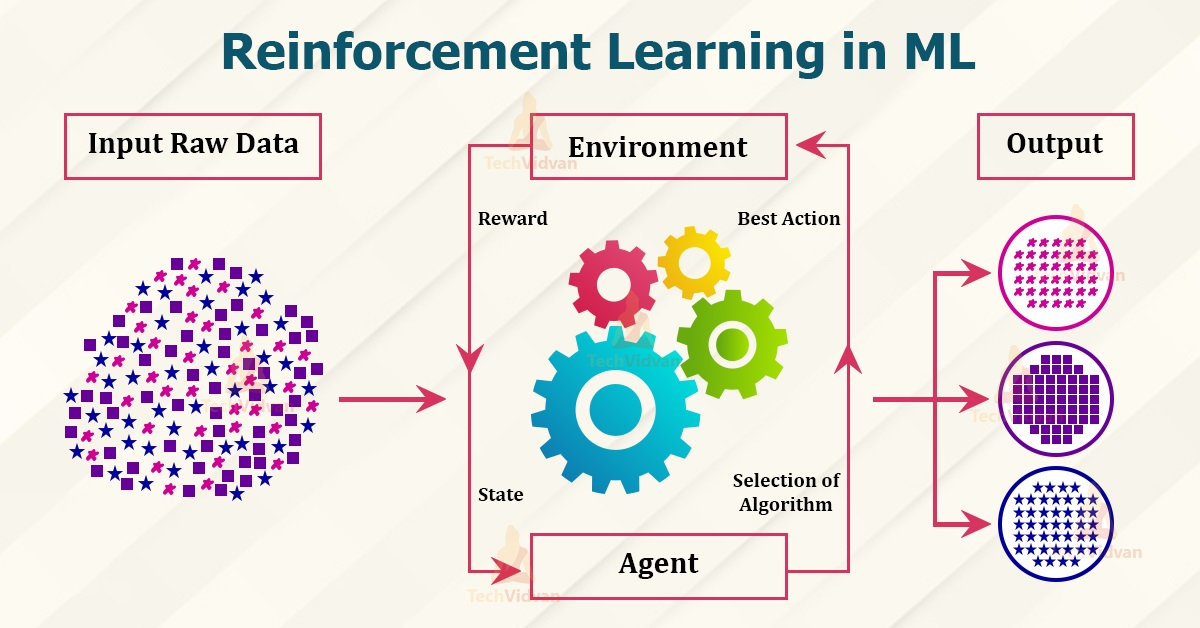

## 2.3 强化学习的基本要素

+ 环境
    
    环境（Environment）是智能体外部的所有事物，并受智能体动作的影响而改变其状态，并反馈给智能体相应的奖励。例如自动驾驶案例中的街道上的情况，围棋比赛中棋盘上的状况，金融市场中由价格、成交量和基本面比率等组成的信息集


+ 状态

    状态（State） 是对环境的描述，可以是离散的或连续的，所有的状态组成状态空间。例如，自动驾驶案例中，外部世界的状态可分为早晚高峰时期和平时非拥堵时期


+ 智能体

    智能体（Agent）可以感知外界环境的状态（State）和反馈的奖励（Reward），并进行学习和决策．智能体的决策功能是指根据外界环境的状态来做出不同的动作（Action），而学习功能是指根据外界环境的奖励来调整策略．


+ 动作

    动作(Action)是对智能体行为的描述，可以是离散的或连续的，所有的动作组成动作空间。例如自动驾驶案例中，刹车、左右转，停车，加速等；金融案例中做多、做空和等待，都是智能体需要完成的动作.
    
    
+ 奖励

    奖励𝑟(𝑠, 𝑎, 𝑠′) 是一个标量函数，即智能体根据当前状态𝑠做出动作𝑎之后，环境会反馈给智能体一个奖励，这个奖励也经常和下一个时刻的状态𝑠′有关. 例如智能体在金融市场中判断状态S为上涨状态，执行动作A买入，则后续在再次判断市场状态S1为下跌时，执行动作A1进行平仓，开仓平仓的价格之差为初始状态S和执行动作A后的奖励𝑟(S, A, S′)



+ 状态转移概率

    状态转移概率P(S′|S, A) 是在智能体根据当前状态𝑠 做出一个动作𝑎之后，环境在下一个时刻转变为状态𝑠′的概率


+ 目标

    强化学习的优化目标为最大化折扣回报率


+ 策略

    策略（Policy） 是智能体根据环境状态S来决定下一步动作A的映射。状态动作组合较少时，可以是规则列表表达；状态动作组合较多时，一般由函数式表达，即*A=F(S)*，列表和函数都是决定性策略，策略也有随机性的，也就是按照一定概率指定动作。随机性策略可以有很多优点：1）在学习时可以通过引入一定随机性更好地探索环境；2）随机性策略的动作具有多样性，这一点在多个智能体博弈时也非常重要。采用确定性策略的智能体总是对同样的环境做出相同的动作，会导致它的策略很容易被对手预测。
    
    
    

   
假设环境中有一个或多个特殊的终止状态（Terminal State），当到达终止状态时，一个智能体和环境的交互过程就结束了．这一轮交互的过程称为一个回合（Episode）或试验（Trial）。一般的强化学习任务（比如下棋、游戏）都属于这种回合式任务（Episodic Task）。

如果环境中没有终止状态（比如终身学习的机器人），即𝑇 = ∞，称为持续式任务（Continuing Task），其总回报也可能是无穷大．为了解决这个问题，我们可以引入一个折扣率来降低远期回报的权重．折扣回报（Discounted Return）定义为

$$ G(\tau)= \Sigma_{t=0}^{T-1}\gamma^tr_{t+1}$$

其中，$\gamma \in [0,1]$ 为折扣率（或贴现率）, 当𝛾接近于0 时，智能体更在意短期回报；而当𝛾接近于1 时，长期回报变得更重要。
    

因为策略和状态转移都有一定的随机性，所以每次试验得到的轨迹是一个随机序列，其收获的总回报也不一样。在持续式任务中，强化学习的优化目标是学习到一个策略$\pi_{\theta}(a|s)$来最大化期望回报（Expected Return），即希望智能体执行一系列的动作来获得尽可能多的平均回报。

强化学习的目标函数为：
$$J(\theta)=E[\Sigma_{t=0}^{T-1}\gamma^tr_{t+1}]$$

其中𝜃为策略函数的参数。

## 2.4 马尔可夫过程

马尔可夫过程（Markov Process）是一组具有马尔可夫性质的随机变量序列𝑠0, 𝑠1, ⋯，𝑠𝑡 ∈ 𝒮，其中下一个时刻的状态𝑠𝑡+1 只取决于当前状态𝑠𝑡，即
𝑝(𝑠𝑡+1|𝑠𝑡, ⋯ , 𝑠0) = 𝑝(𝑠𝑡+1|𝑠𝑡),其中𝑝(𝑠𝑡+1|𝑠𝑡) 称为状态转移概率。马尔可夫链是一组具有马尔可夫性质的离散随机变量的集合。对于概率空间$(\Omega,F,P)$内以一维可数集为指数集的随机变量集合$X=X_{n}:n>0$,若随机变量的取值都在可数集内，$X=s_{i},s_{i}\in s$，且随机变量的条件概率满足如下关系式：

$$p(X_{t+1}|X_{t},...,X_{1})=p(X_{t+1}|X_{t})$$

则$X$被称为马尔可夫链，可数集$s \in Z$被称为状态空间（state space），马尔可夫链在状态空间内的取值称为状态。这里定义的马尔可夫链是离散时间马尔可夫链（Discrete-Time MC, DTMC），其具有连续指数集的情形虽然被称为连续时间马尔可夫链（Continuous-Time MC, CTMC），但在本质上是马尔可夫过程（Markov process），马尔可夫链的指数集被称为“步”或“时间步（time-step）”。

上式在定义马尔可夫链的同时定义了马尔可夫性质，该性质也被称为“无记忆性（memorylessness）”，即t+1步的随机变量在给定第t步随机变量后与其余的随机变量条件独立（conditionally independent）。在此基础上，马尔可夫链具有强马尔可夫性（strong Markov property），即对任意的停时（ stopping time），马尔可夫链在停时前后的状态相互独立。

马尔可夫过程描述了环境与智能体之间的状态和状态转移过程，而强化学习就是对马可夫过程的描述且提供了解决方案。


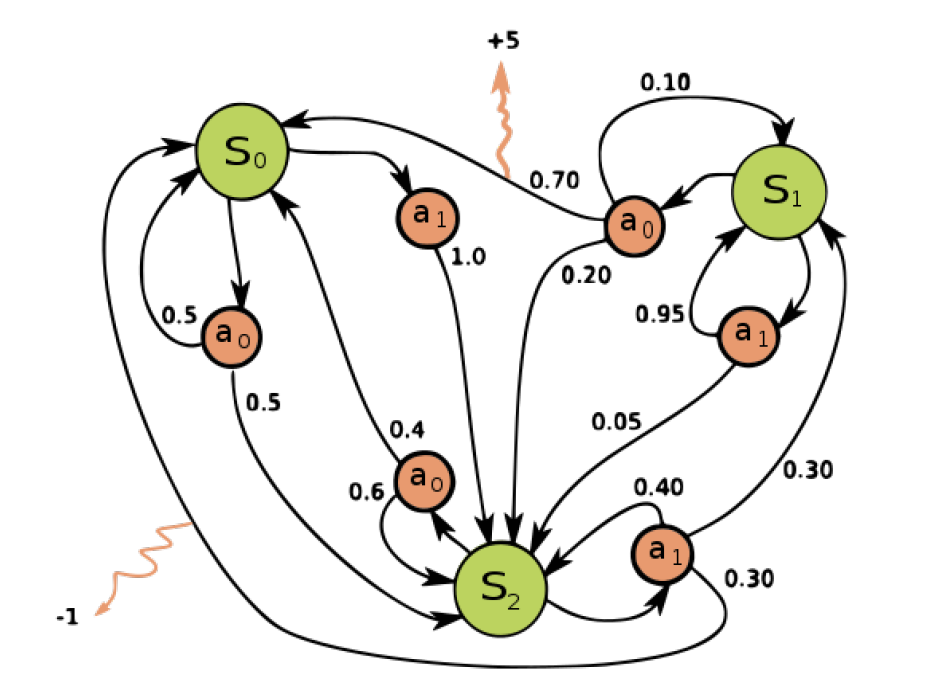


如上图所示，系统一共有三个状态$S_{1},S_{2},S_{3}$，每个状态下可以做两个动作$a_{0},a_{1}$，在一个状态下做了一个动作以后，箭头表示有多大概率会转向另一个状态。转换的过程中，如果有回报和惩罚，会在转换箭头处显示。

例如：
在状态$S_{2}$下做动作$a_{1}$,有40%的概率回到状态$S_{2}$， 而有30%的概率系统会变成状态$S_{0}$，同时得到回报-1；
在状态$S_{1}$下做动作$a_{0}$,有10%的概率回到状态$S_{1}$， 而有70%的概率系统会变成状态$S_{0}$，同时得到回报+5。

## 2.5 强化学习的应用

强化学习多学科中都有着有效的应用，他们在不同学科中强化学习的方法与思想可能有着不同的专业名称。比如在计算机科学中属于机器学习（Machine Learning），在工程领域属于最优化控制（Optimal Control），在神经科学领域属于奖励系统（Reward System），在心理学领域中属于经典/操作性条件反射（Classical/Operant Conditioning）,在经济学领域属于有限理性（bounded rationality）理论，在运筹学中属于也有相应的数学基础。这些交叉领域相关的关系如下图所示：

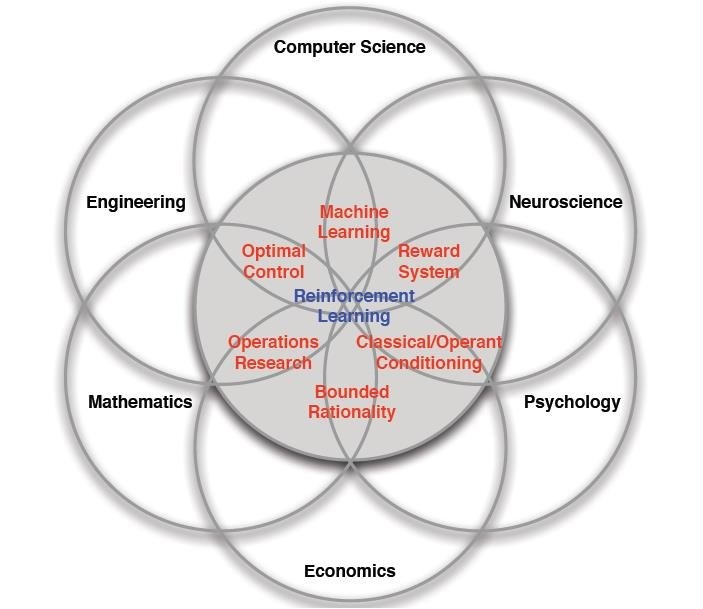

### 2.5.1 各个领域的应用实例

**无人驾驶**

在无人驾驶中，需要考虑的问题是非常多的，如：不同地方的限速不同限速，是否是可行驶区域，如何躲避障碍等问题。自动驾驶的任务可以与强化学习相结合，比如轨迹优化，运动规划，动态路径，最优控制，以及高速路中的情景学习策略。比如，自动停车策略能够完成自动停车。变道能够使用q-learning来实现，超车能应用超车学习策略来完成超车的同时躲避障碍并且此后保持一个稳定得速度。

**工业自动化**

在工业自动化中，基于强化学习的机器人被用于执行各种任务。这些机器人不仅效率比人类更高，还可以执行危险任务。Deepmind使用AI智能体来冷却Google数据中心是一个成功的应用案例。通过这种方式，节省了40%的能源支出。现在，这些数据中心完全由人工智能系统控制，除了很少数据中心的专家，几乎不再需要其他人工干预。该系统的工作方式如下：

+ 每五分钟从数据中心获取数据快照，并将其输入深度神经网络
+ 预测不同组合将如何影响未来的能源消耗
+ 在符合安全标准的情况下，采取具有最小功耗的措施
+ 向数据中心发送相应措施并实施操作

**金融贸易**

有监督的时间序列模型可用来预测未来的销售额，还可以预测股票价格。然而，这些模型并不能决定在特定股价下应采取何种行动，强化学习（RL）正是为此问题而生。通过市场基准标准对RL模型进行评估，确保RL智能体正确做出持有、购买或是出售的决定，以保证最佳收益。通过强化学习，金融贸易不再像从前那样由分析师做出每一个决策，真正实现机器的自动决策。例如，IBM构建有一个强大的、面向金融交易的强化学习平台，该平台根据每一笔金融交易的损失或利润来调整奖励函数。

**自然语言处理**

强化学习可用于文本摘要、问答和机器翻译等NLP任务，也可用于对话生成任务。深度强化学习(Deep-RL)使用两个虚拟智能体模拟对话，并学习多轮对话中的未来奖励的建模，同时，应用策略梯度方法使高质量对话获得更高奖励，如连贯性、信息丰富度和简洁性等。自然语言处理的更多案例请参看[Github](https://github.com/adityathakker/awesome-rl-nlp)

**医疗保健**

医疗保健领域，RL系统为患者只能提供治疗策略。该系统能够利用以往的经验找到最优的策略，而无需生物系统的数学模型等先验信息，这使得基于RL的系统具有更广泛的适用性。基于RL的医疗保健动态治疗方案（DTRs）包括慢性病或重症监护、自动化医疗诊断及其他一些领域。DTRs的输入是一组对患者的临床观察和评估数据，输出则是每个阶段的治疗方案。通过RL，DTRs能够确定患者在特定时间的最佳治疗方案，实现时间依赖性决策。在医疗保健中，RL方法还可用于根据治疗的延迟效应改善长期结果。对于慢性病，RL方法还可用于发现和生成最佳DTRs。

**工程领域**

在工程领域，Facebook提出了开源强化学习平台 —— Horizon，该平台利用强化学习来优化大规模生产系统。在Facebook内部，Horizon被用于：

+ 个性化指南
+ 向用户发送更有意义的通知
+ 优化视频流质量

Horizon主要流程包括：

+ 模拟环境
+ 用于数据处理的分布式数据平台
+ 模型的训练与输出
+ 一个典型例子是，强化学习根据视频缓冲区的状态和其他机器学习系统的估计可选择的为用户提供低比特率或高比特率的视频。

Horizon还能够处理以下问题：

+ 大规模部署
+ 特征规范化
+ 分布式学习
+ 超大规模数据的处理和服务，如包含高维数据和数千特征的数据集。

**新闻推荐**

在新闻推荐领域，用户的喜好不是一成不变的，仅仅基于评论和（历史）喜好向用户推荐新闻无法一劳永逸。基于强化学习的系统则可以动态跟踪读者反馈并更新推荐。构建这样一个系统需要获取新闻特征、读者特征、上下文特征和读者阅读的新闻特征。其中，新闻特征包括但不限于内容、标题和发布者；读者特征是指读者与内容的交互方式，如点击和共享；上下文特征包括新闻的时间和新鲜度等。然后根据用户行为定义奖励函数，训练RL模型。

**游戏训练**

RL在游戏领域中的应用备受关注且极为成功，最典型的便是前些年人尽皆知的AlphaGo、AlphaZero。通过强化学习，AlphaGoZero能够从头学习围棋游戏，并自我学习。经过40天的训练，AlphaGoZero的表现超过了世界排名第一的柯洁。该模型仅包含一个神经网络，且只将黑白棋子作为输入特征。由于网络单一，一个简单的树搜索算法被用来评估位置移动和样本移动，而无需任何蒙特卡罗展开。



### 2.5.2 游戏训练应用展示

“FC弹球”是一款敏捷游戏，游戏目标是发射子弹消去所有的小方块。虽然玩法很简单， 但是在当年确实非常受欢迎的。游戏目标是反弹子弹消去所有的小方块，并获得相应的奖励。

Deepmind公司将开发的强化学习程序应用在FC弹球游戏上，得到了非常显著的效果。以上强化学习过程可以分为三个阶段：

1. 游戏开始，计算机智能体几乎不知道怎样行动才能够连续得分


2. 经过120分钟训练后，智能体可以相当于很娴熟的玩家的水平


3. 经过240分钟训练，智能体尝试着在屏幕左侧打开一个缺口，使得小球弹到墙上与平面的空隙处连续得分，此动作则是这个游戏的最好得分过程

我们可以看到，计算机通过自主学习完成了和人类一样的学习过程，而且用时更短，效率更高。强化学习是所有机器学习中最接近人类学习的过程。

## 2.6 强化学习在量化投资中的作用

如下图所示，机器学习在投资中一般遵循以下流程：

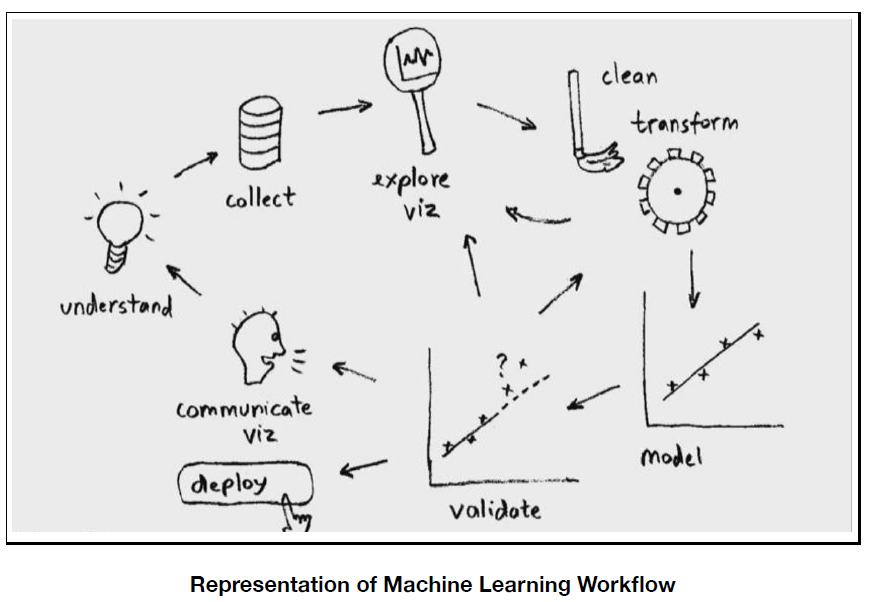

如上图所示，首先研究人员需要理解(understand)要研究的问题，明确想要研究的目标和大概能够得到的结果；然后收集（collect）并探索(explore)相关数据；对可以使用的数据进行清洗（clean）与整理(transform); 整理数据一般情况下较为繁琐，耗时巨大。之后进入建模(model)环节，也就是机器学习各种各样的模型，也可以是传统意义的统计模型；通过模型的验证(validate)过程后，然后可以进行模型的部署（deploy）；部署阶段指的就是真实的应用环节，在投资中就是设计自动交易程序直接对市场下进行程序化订单的过程。如果模型没有通过验证过程或者达不到想要的标准，则需要重新交流（communicate）以寻求对研究对象的更加深入的理解，并重复以上步骤。

在量化投资过程中也是这样， 我们首先要理解金融产品理解金融市场，通过深入的理解形成我们的初始交易思想。然后进入相关金融数据的收集、探索、清洗和整理过程；完成一些列的准备过程之后，我们对数据进行建模，建模的方法多种多样，如传统的统计学习（回归，主成分分析，方差分析或一些其他方法）或机器学习方法（K均值，聚类，决策树等）。强化学习便会应用在建模和模型验证的阶段，它是与统计学习、监督学习、非监督学习具有相同地位的一个重要的量化投资流程，帮助研究者更好地对模型进行评估，从而达到更好地认识数据，进而认识事物本质的方法。

---

# 3. 引例：迷宫实验

我们以一个简单的实验来认识强化学习。首先通过编程实现案例的问题解决，然后将案例用到的原理进行阐释。


## 3.1. 实验：强化学习解决迷宫问题

【实验概述】

+ 本实验训练一个强化学习模型。根据已知迷宫地图，让模型自动找出走出迷宫的方法


【实验目标】

+ 通过实验认识强化学习的过程和实现方法
+ 认识强化学习中的要素
+ 能够将强化学习的要素----状态与动作在描述问题时一一对应
+ 使用Q-Learning完成迷宫行走方案
+ 能够将实际问题切分为单元任务，编写函数完成单元任务
+ 拼接函数完成单元任务整合


【实验要求】

+ 仔细阅读实验条件描述
+ 逐行键入代码
+ 分析每行代码的输入和输出（如果有）
+ 遇到自定义函数连接时，注意函数之间的接口以及接口的数据类型
+ 如果有函数功能不清楚，需要单独提取、运行并查询其函数内在逻辑


【实验描述与问题分析】

如图所示迷宫，游戏者开始位置位于房间0-4中的任意位置，目的是从开始位置以最快的步数走出迷宫，达到房间5即完成游戏。
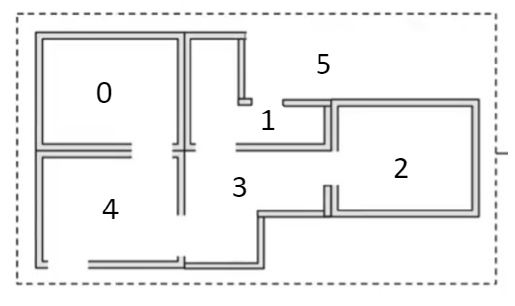

想要达到房间5，必须要经过房间1或房间4，其他房间无法到达。

由于我们已经看到迷宫的布局全貌， 所以很容易从图像上辨识出要走的路径。但是计算机不知道，我们的目标是要计算机能够识别这个路径。依据强化学习的元素，我们需要以下条件：


+ 系统状态：系统分为5个状态，即房间1至房间5
+ 系统状态对应的动作，我们可以用以下表格来表示：
   
   系统状态|能够执行的动作|动作执行后的回报|说明
     :-: |:-:| :-: | :-:
    0|4|0|在房间0走到房间4得0分
    1|3|0|在房间1走到房间3得0分
    1|5|100|在房间1走到房间5得100分
    2|3|0|在房间2走到房间3得0分
    3|1|0|在房间3走到房间1得0分
    3|4|0|在房间3走到房间4得0分
    4|0|0|在房间4走到房间0得0分
    4|5|100|在房间4走到房间5得100分
    5|1|0|在房间5走到房间1得0分
    5|4|0|在房间5走到房间4得0分
    5|5|100|在房间5走到房间5得100分
    
    
 + 除以上动作外，其余动作均不可执行。比如说从房间1走到房间2，由于路径不通，所以无任何回报，回报为-1
 
 
如此，我们可以定义回报矩阵如下：

$$ R = 
\left[ \begin{matrix}
-1 & -1 & -1 & -1 & 0 & -1 \\
-1 & -1 & -1 & 0 & -1 & 100 \\
-1 & -1 & -1 & 0 & -1 & -1 \\
-1 & 0 & 0 & -1 & 0 & -1 \\ 
0 & -1 & -1 & 0 & -1 & 100 \\ 
-1 & 0 & -1 & -1 & 0 & 100 
\end{matrix}
\right]$$

以上矩阵可以解读为：行数为所在房间数，列数为可执行动作数，元素值为在行数的房间执行了列数的动作得到的回报。
注意：行数第一个数为0，列数第一个数也为0.

比如说，
+ 元素$a_{00}=-1$， 表示在房间0走到房间0，回报为-1；
+ 元素$a_{12}=-1$， 表示在房间1走到房间2，由于路径不通，则回报为-1；
+ 元素$a_{23}=0$， 表示在房间2走到房间3，回报为0；
+ 元素$a_{45}=100$， 表示在房间4走到房间5，回报为100

定义了回报矩阵R，就相当于我们定义了游戏规则，接下来的目的是怎样在给定规则的情况下，让智能体自动执行最优动作。

In [1]:
# 引入相关库
import numpy as np

# 设置小数显示精度
np.set_printoptions(precision=4)

# 关闭所有警告
import warnings 
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

In [2]:
# 将回报率矩阵写成代码
R = np. array([
                [-1,- 1,- 1,- 1,0,- 1],
                [- 1,- 1,- 1,0,- 1,100],
                [- 1,- 1,- 1,0,- 1,- 1],
                [- 1,0,0,- 1,0,- 1],
                [0,-1,-1,0,- 1,100],
                [- 1,0,- 1,- 1,0,100]
                ])
print(f'回报矩阵为： \n {R}')

回报矩阵为： 
 [[ -1  -1  -1  -1   0  -1]
 [ -1  -1  -1   0  -1 100]
 [ -1  -1  -1   0  -1  -1]
 [ -1   0   0  -1   0  -1]
 [  0  -1  -1   0  -1 100]
 [ -1   0  -1  -1   0 100]]


In [3]:
# 定义初始的Q矩阵
Q=np.array(np.zeros([6,6]))
print(f'Q矩阵为： \n {Q}')

Q矩阵为： 
 [[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


这里我们创建了一个新的矩阵Q。他的目的明确，充当了“策略”的作用。Q矩阵即将指导着智能体的行动方案。

需要区分一下R矩阵和Q矩阵的区别。R矩阵表示了在哪个房间走到哪个房间，单步的回报，也就是游戏规则，是游戏开始时就给出的。而Q矩阵则需要我们首先定义为所有的动作都为0，要通过多次“学习”计算出来每个状态的“Q值”（后续详细介绍），这个Q值就是未来“部署”的依据，我们将根据它来确定每一步怎样行动。

接下来的目的是根据Q算法逐步更新Q矩阵，使得每一个“状态-动作”实数对得以通过长期抽样进行“学习”，最终达到Q矩阵能够表明每一个“状态-动作”实数对的“长期”价值！

In [4]:
# 定义初始状态
initial_state=1

# 定义回报贴现（折扣）率，后续更新Q矩阵时会用到
gamma=0.8

In [5]:
# 获得R矩阵中的第几行的所有元素
current_state_row=R[initial_state]
current_state_row

array([ -1,  -1,  -1,   0,  -1, 100])

In [7]:
# 获得当前选定列的回报>=0的元素的坐标
# 注意，此处np.where返回的类型是元组(tuple),元组的第一个元素是满足np.where条件的所有元素的索引，需要指定其为np.array,之后的[0]不可以省略
action=np.where(current_state_row >=0)[0]
action

array([3, 5])

In [8]:
# 将上述代码综合写成自定义函数。输入：状态值,类型是int，也就是初始位置在哪个房间；输出：可执行的动作，类型是np.array
# 后续在3.3中，涉及到修改迷宫时，可直接修改R矩阵，并保持其他部分代码不变

def available_actions(state):
    
    #创建一个np.array, 返回R矩阵第几列，第几列就是在哪个房间可执行的动作
    current_state_row=R[state]
    
    #这个位置返回第几列中，所有单步回报>0的动作
    action=np.where(current_state_row >=0)[0]
    
    return action


来测试一下这个函数：

In [9]:
for i in range(6):
    initial_state=i
    available_action=available_actions(initial_state)
    available_action
    print (f'初始状态为{initial_state}时，可执行的动作为：{available_action}')

初始状态为0时，可执行的动作为：[4]
初始状态为1时，可执行的动作为：[3 5]
初始状态为2时，可执行的动作为：[3]
初始状态为3时，可执行的动作为：[1 2 4]
初始状态为4时，可执行的动作为：[0 3 5]
初始状态为5时，可执行的动作为：[1 4 5]


以上测试返回结果解读：
+ 房间1可以做的动作是3，向第3个房间走；还可以向第5个房间走；
+ 房间3可以做的动作是3，向第1个房间走；还可以向第2个房间走；还可以向第4个房间走；
+ 房间4可以做的动作是3，向第0个房间走；还可以向第3个房间走；还可以向第5个房间走；

为了更新Q矩阵，我们的做法是每一步需要选择做哪个动作时，**随机**指定应该做的动作，如是：

In [10]:
# 编写自定义函数，输入：当前能够执行的所有动作，类型np.array；输出：输入的动作中随机选择一个，类型int
# np.random.choice 在第一个参数中，随机进行选择，第一个参数必须是一维的；
# 官方文档解释不细致，需要仔细实践


def next_action(available_action):
    naction=int(np.random.choice(available_action,1))
    return naction

available_action=available_actions(initial_state)
action=next_action(available_action)
action

1

为了测试以上函数是否达到了目的，我们做如下实验：

In [13]:
initial_state=3
for i in range(10):
    print ("当前状态：",initial_state, " 可执行的操作：",next_action(available_actions(initial_state)))

当前状态： 3  可执行的操作： 2
当前状态： 3  可执行的操作： 2
当前状态： 3  可执行的操作： 1
当前状态： 3  可执行的操作： 4
当前状态： 3  可执行的操作： 2
当前状态： 3  可执行的操作： 4
当前状态： 3  可执行的操作： 2
当前状态： 3  可执行的操作： 2
当前状态： 3  可执行的操作： 4
当前状态： 3  可执行的操作： 4


In [14]:
# 给定状态，R矩阵选择能够执行的动作，定义Q矩阵中选择Q值最大的那个动作是要实现的目标

state=4

max_index = np.where(Q[state,] == np.max(Q[state,]))[0]
# np.where(Q[state,] == np.max(Q[state,])) 返回Q表中的某一列（某一个状态）中，Q值最大的索引

max_index

array([0, 1, 2, 3, 4, 5])

我们可以看到：执行的结果有时候是1，有时候是2或者4，这是我们想要的结果，因为动作是随机选择的。

给定R矩阵只是给出了初始的可选动作，但是长期的迷宫行走结果还无法得知。为了选择哪个动作是最优的，我们来更新Q矩阵：

<font color=#FF9900>Q[state,]</font>是一个数组，表示给定状态时，提取了Q矩阵中给定状态的那一行。接下来，我们定义<font color=#FF9900>update()</font>函数，目的是实现多次迷宫行走，将单步的值进行累加，最后得到一个完整的Q矩阵。

In [21]:
# 自定义update函数，输入当前状态，状态以及学习速率
def update(current_state,state,gamma):
    
    #给定状态，找到Q值最大的索引
    max_index = np. where(Q[state,] == np. max(Q[state,]))[0]
    
    
    #如果Q矩阵的最大值的多于一个（好几个相等且都是最大）
    if max_index.shape[0] > 1:
    
    #在其中随机选择一个
        max_index = np.random.choice(max_index,size=1)
    
    #否则，max_index返回最大的索引
    else :
        max_index = max_index
    
    #获取Q表中，给定状态最大的Q值
    max_value = Q[state, max_index]
     

# Q学习：Q值更新方法为：走完一步以后，Q值等于之前的R矩阵相对应的值加上当前Q表中的最大值*gamma。
# 后续的讲述中，这个方法称为时序差分方法(temporal-difference)
# 由于max_value表示Q表中的最大值，这个值我们给他打个折扣，表示虽然要参考但是参考幅度有限
    Q[current_state, action] = R[current_state, action] + gamma * max_value


接下来，进入强化学习的训练过程：

In [22]:
%%time
#记录训练用时

# 导入numpy库并设置显示精度
import numpy as np
np.set_printoptions(precision=4)


#定义训练轮数
number_of_training_epochs=1000

for i in range(number_of_training_epochs):
   
    # 随机指定当前状态，Q.shape表示Q表的维度，[0]表示有多少行，即状态的数目
    current_state = np. random. randint(0,int(Q.shape[0]))
    
    #读取当前状态对应的可执行动作
    available_act = available_actions(current_state)
    
    #从可执行动作中随机选取那些Q值最大的
    action = next_action(available_act)
    
    #调用以上update函数以更新Q表
    update(current_state,action, gamma)

# 更新Q表后，将每个值除以Q表中最大的数值，标准化Q表
print(f'训练后，Q矩阵为: \n \n {Q/np.max(Q)*100}')

print ("\n训练用时：")

训练后，Q矩阵为: 
 
 [[  0.    0.    0.    0.   80.    0. ]
 [  0.    0.    0.   64.    0.  100. ]
 [  0.    0.    0.   64.    0.    0. ]
 [  0.   80.   51.2   0.   80.    0. ]
 [ 64.    0.    0.   64.    0.  100. ]
 [  0.   80.    0.    0.   80.  100. ]]

训练用时：
CPU times: user 49.9 ms, sys: 10.4 ms, total: 60.3 ms
Wall time: 51.1 ms


In [23]:
current_state = 2
steps = [current_state]

#指定状态，每次根据Q表中最大值进行选取，后更新当前状态直到当前状态是5为止
while current_state != 5:
    next_step_index = np. where(Q[current_state,] == np. max(Q[current_state,]))[0]
    
    if next_step_index. shape[0] > 1:
        next_step_index = int(np. random. choice(next_step_index,size= 1))
    else:
        next_step_index = int(next_step_index)
    
    steps. append(next_step_index)
    current_state = next_step_index

In [24]:
print(f'选择路径： {steps}')

选择路径： [2, 3, 1, 5]


In [25]:
# 将以上代码写成一个自定义函数puzzle_path 
# 输入：initial_state(int), 输出：selected path(list)

import numpy as np
np.set_printoptions(precision=4)


def puzzle_path(initial_state=0,gamma=0.8,number_of_epochs=10000):
    
    R = np. array([[0,- 1,- 1,- 1,0,- 1],
                [- 1,- 1,- 1,0,- 1,100],
                [- 1,- 1,- 1,0,- 1,- 1],
                [- 1,0,0,- 1,0,- 1],
                [0,-1,-1,0,- 1,100],
                [- 1,0,- 1,- 1,0,100]])
    
    Q=np.array(np.zeros([6,6]))
    
       
    def available_actions(state):
        current_state_row=R[state]
        action=np.where(current_state_row >=0)[0]
        return action
    
    def next_action(available_action):
        naction=int(np.random.choice(available_action,1))
        return naction
    
    def update(current_state, state, gamma):
    
        max_index = np. where(Q[state,] == np. max(Q[state,]))[0]
        if max_index.shape[0] > 1:
            max_index = int(np.random.choice(max_index,size=1))
        else :
            max_index = int(max_index)
        max_value = Q[state, max_index]
        Q[current_state, action] = R[current_state, action] + gamma * max_value
    
    for i in range(number_of_epochs):
        current_state = np.random.randint(0,int(Q.shape[0]))
        available_act = available_actions(current_state)
        action = next_action(available_act)
        update(current_state,action, gamma)
        
    
    
    steps = [initial_state]
    current_state=initial_state
    
    #进入循环，只要当前状态不是5，任务就未结束
    while current_state != 5:
        
        #下一步动作的选择Q表中Q值最大的一步
        next_step_index = np. where(Q[current_state,] == np. max(Q[current_state,]))[0]

        #如果Q值最大的动作多于一个则随机选择
        if next_step_index. shape[0] > 1:
            next_step_index = int(np. random. choice(next_step_index,size= 1))
        else:
            next_step_index = int(next_step_index)

        #将步骤添加至steps路径列表，以供输出
        steps. append(next_step_index)
        
        #更新当前位置直至位置为5
        current_state = next_step_index

    print(f'行进路径： {steps}')

In [26]:
%%time

# 设置实验次数
number_of_trails=20

# 设置初始状态
initial_state=2

print ("初始状态：",initial_state)

for i in range(number_of_trails):
    puzzle_path(initial_state)

初始状态： 2
行进路径： [2, 3, 4, 5]
行进路径： [2, 3, 1, 5]
行进路径： [2, 3, 4, 5]
行进路径： [2, 3, 1, 5]
行进路径： [2, 3, 4, 5]
行进路径： [2, 3, 1, 5]
行进路径： [2, 3, 1, 5]
行进路径： [2, 3, 4, 5]
行进路径： [2, 3, 1, 5]
行进路径： [2, 3, 1, 5]
行进路径： [2, 3, 1, 5]
行进路径： [2, 3, 4, 5]
行进路径： [2, 3, 1, 5]
行进路径： [2, 3, 1, 5]
行进路径： [2, 3, 4, 5]
行进路径： [2, 3, 1, 5]
行进路径： [2, 3, 4, 5]
行进路径： [2, 3, 1, 5]
行进路径： [2, 3, 4, 5]
行进路径： [2, 3, 4, 5]
CPU times: user 7.41 s, sys: 909 ms, total: 8.31 s
Wall time: 7.52 s


### 3.1.1 实验总结

此处，函数的核心是<font color=#FF9900>update()</font>方法。<font color=#FF9900>update()</font>方法能够将Q表通过每一次迭代进行更新，它的元素Q值达到收敛程度时，就完成了整个流程的Q表更新。至于更新基于的公式，除了有上述算法以外，还有诸多其他算法。至于哪一种算法最合理，是个仁者见仁智者见智的事情。在数据量特别大的情况下，我们认为收敛速度较快的算法相对省资源，是比较可行的算法。第四部分中将介绍其他各种算法。

在此实验中我们定义了如下要素:

+ 环境：房间0-5分别用R矩阵中的0-5表示

+ 动作：在房间0-5中，可执行的动作就是通往下一个房间的号码，用R矩阵的列的数目表示

+ 回报：定义了Q矩阵，Q矩阵中的数值即表示给定“状态”和“动作”未来的平均回报

+ 策略：给定“状态”选择“动作”的规则，即选择Q矩阵中每一行值最大的那个元素

通过多次重复性实现，实现了每一次行走迷宫都得到了最优的结果，达到了强化学习的目的。

## 3.2 实验：修改迷宫实验

【实验概述】

+ 根据3.1中的迷宫实验，修改迷宫，达到智能体能够识别正确的路径的目的

+ 如图所示，将迷宫内容有所修改，我们需要完成以下工作：
    1. 修改R矩阵，初始状态-动作对的回报，也就是游戏规则
    2. 直接运行puzzle_path函数，以更新Q矩阵
    3. 得到最新Q矩阵
    4. 实现走出迷宫的路径打印

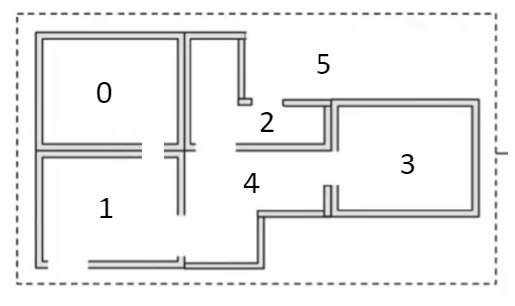

【实验目标】

+ 认识强化学习中的要素
+ 能够将强化学习的要素----状态与动作在描述问题时一一对应
+ 使用Q-Learning完成迷宫行走方案
+ 能够将实际问题切分为单元任务，编写函数完成单元任务
+ 拼接函数完成单元任务整合


【实验要求】

+ 仔细阅读题目条件，逐行键入代码
+ 分析每行代码的输入和输出（如果有）
+ 遇到函数关系较为复杂时，注意函数之间的接口，确保接口数据类型一一对应
+ 如果有函数功能不清楚，需要单独提取并查询其函数内在逻辑

【实验步骤】

+ 依次键入以下代码






In [27]:
import numpy as np

def puzzle_path2(initial_state=0,gamma=0.8,number_of_epochs=10000):
    
    R = np. array([
                [0,0,- 1,- 1,-1,- 1],
                [0,0,-1,-1,0,100],
                [-1,- 1,0,-1,0,100],
                [-1,-1,-1,0,0,-1],
                [-1,0,0,0,0,-1],
                [-1,0,0,-1,-1,100]
                ])
    
    Q=np.array(np.zeros([6,6]))
    
       
    def available_actions(state):
        current_state_row=R[state]
        action=np.where(current_state_row >=0)[0]
        return action
    
    def next_action(available_action):
        naction=int(np.random.choice(available_action,1))
        return naction
    
    def update(current_state, state, gamma):
        max_index = np. where(Q[state,] == np. max(Q[state,]))[0]
        if max_index.shape[0] > 1:
            max_index = int(np.random.choice(max_index,size=1))
        else :
            max_index = int(max_index)
        max_value = Q[state, max_index]
        Q[current_state, action] = R[current_state, action] + gamma * max_value
    
    for i in range(number_of_epochs):
        current_state = np.random.randint(0,int(Q.shape[0]))
        available_act = available_actions(current_state)
        action = next_action(available_act)
        update(current_state,action, gamma)
        
    
    return Q

In [28]:
Q=puzzle_path2()

In [29]:
def run_puzzle(initial_state=1):
    
    steps = [initial_state]
    current_state=initial_state
    
    while current_state != 5:
        next_step_index = np. where(Q[current_state,] == np. max(Q[current_state,]))[0]

        if next_step_index. shape[0] > 1:
            next_step_index = int(np. random. choice(next_step_index,size= 1))
        else:
            next_step_index = int(next_step_index)

        steps. append(next_step_index)
        current_state = next_step_index

    print(f'    行进路径： {steps}')
    

In [30]:
#将所有状态和行进路径一起打印，每个状态进行3次

for state in range(6):
    print ("初始状态: ",state)
    for runtime in range(3):
        run_puzzle(state)

初始状态:  0
    行进路径： [0, 1, 5]
    行进路径： [0, 1, 5]
    行进路径： [0, 1, 5]
初始状态:  1
    行进路径： [1, 5]
    行进路径： [1, 5]
    行进路径： [1, 5]
初始状态:  2
    行进路径： [2, 5]
    行进路径： [2, 5]
    行进路径： [2, 5]
初始状态:  3
    行进路径： [3, 4, 1, 5]
    行进路径： [3, 4, 1, 5]
    行进路径： [3, 4, 2, 5]
初始状态:  4
    行进路径： [4, 1, 5]
    行进路径： [4, 2, 5]
    行进路径： [4, 1, 5]
初始状态:  5
    行进路径： [5]
    行进路径： [5]
    行进路径： [5]


In [31]:
%%time

# 设置实验次数
number_of_trails=100

# 设置初始状态
initial_state=3

for i in range(number_of_trails):
    puzzle_path2(initial_state)

Q=puzzle_path2()

print (f'Q_table is ：\n {Q}')

Q_table is ：[[320. 400.   0.   0.   0.   0.]
 [320. 400.   0.   0. 320. 500.]
 [  0.   0. 400.   0. 320. 500.]
 [  0.   0.   0. 256. 320.   0.]
 [  0. 400. 400. 256. 320.   0.]
 [  0. 400. 400.   0.   0. 500.]]
CPU times: user 32.8 s, sys: 1.15 s, total: 33.9 s
Wall time: 33.2 s


## 3.3 实验总结

通过 3.1-3.2 的实验我们可以看到，解决迷宫问题的核心目标是定义并且更新Q矩阵。Q矩阵表示了在给定状态下，做某一个动作的具体价值是多少。有了Q矩阵，当再遇到同样的状态时，便会查找Q矩阵中价值最高的动作并加以选择。长此以往，能够在多次重复迷宫问题时，每一步都选择最优解决方案直到最后得到全局的最优解决方案。同时，在一次次重新解决迷宫问题时，也可以继续更新Q矩阵，使得其表示的“状态-动作”价值包含了更多的可能性也更加准确。

在强化学习中，像这种通过“实验”或“抽样”的方法，创造Q矩阵（通常叫做Q表，Q-Table），再在实际使用的过程中依照Q表来选择最优化动作的行为叫做Q学习（Q-Learning）。Q学习是强化学习最常见的一种方式。

---

# 4. 强化学习的算法

在第三部分中的迷宫问题中，在我们不知道迷宫的全景时，是通过随机探索的方法来试图绘制一幅迷宫的全景，这个全景就相当于我们实际应用中的地图，它指引了在地图上的任何位置可以去向的所有可能的方向。我们把不同的位置设置为不同的状态，去向下一个位置设置成不同的动作，这就相当于我们建立了马尔可夫决策过程中的状态空间$\mathscr{S}$和动作空间$\mathscr{A}$, 然而对于马尔可夫决策过程MDP，他的五元组的另外三部分$\mathscr{P,r,\tau}$。尤其是状态转移概率$\mathscr{P}$和回报$\mathscr{r}$， 在实际情况下往往不可知，就像在第三部分中的实验，需要经过随机探索的过程来认识这个世界。

我们把给定MDP五元组$\mathscr{S,A,P,r,\tau}$元素齐全的强化学习问题称为基于模型的强化学习(Model-Based Reinforcement Learning)，把其中只知道$\mathscr{S,A}$的称为无模型强化学习问题(Model-Free Reinforcement Learning)。在这里的五元组最后一个元素$\mathscr{\tau}$属于超参数，需要人为指定。


基于模型的强化学习问题，也就是在模型已知时，可以通过动态规划的方法来计算，常用的方法是蒙特卡罗方法。

## 4.1 蒙特卡罗方法

在很多应用场景中，马尔可夫决策过程的状态转移概率𝑝(𝑠′|𝑠, 𝑎) 和奖励函数𝑟(𝑠, 𝑎, 𝑠′) 都是未知的。在这种情况下，需要智能体和环境进行交互，并收集一些样本，然后再根据这些样本来求解马尔可夫决策过程最优策略。

Q函数$Q^{\pi}(s,a)$是初始状态为𝑠，并执行动作𝑎后所能得到的期望总回报:

$$Q^{\pi}(s,a)=E[G(\tau_{S_{0}=s, a_{0}=a})]$$

其中$\tau_{S_{0}=s,a_{0}=a}$表示轨迹𝜏的起始状态和动作为𝑠, 𝑎．$G(\tau)$ 是在$\tau$轨迹下的总回报。

如果模型未知，Q函数可以通过采样来进行计算，这就是蒙特卡罗方法。对于一个策略𝜋，智能体从状态𝑠，执行动作𝑎开始，然后通过随机游走的方法来探索环境，并计算其得到的总回报。假设我们进行𝑁次试验，得到𝑁个轨迹𝜏(1), 𝜏(2), ⋯ , 𝜏(𝑁)，其总回报分别为𝐺(𝜏(1)), 𝐺(𝜏(2)), ⋯ , 𝐺(𝜏(𝑁))，则Q函数可以近似为：

$$Q^{\pi}(s,a) \approx \hat{Q^{\pi}}(s,a)= \frac{1}{N}\Sigma_{n=1}^{N}G(\tau_{S_{0}=s,a_{0}=a}^{(n)})$$


当𝑁 → ∞时，$\hat{Q^{\pi}}(s,a) \rightarrow Q^{\pi}(s,a)$

在近似估计出Q函数$\hat{Q^{\pi}}(s,a)$之后，就可以进行策略改进。然后在新的策略下重新通过采样来估计Q函数，并不断重复，直至收敛。


## 4.2 利用与探索


在蒙特卡罗方法中，如果采用确定性策略𝜋，每次试验得到的迹是一样的，只能计算出$Q^{\pi}(s,\pi(s))$，而无法计算其他动作𝑎′的Q函数，因此也无法进一步改进策略。这种情况下，每一次动作的选择仅仅是对当前策略的进行了利用（exploitation），而错过了对环境的探索（exploration），即无法使智能体的轨迹覆盖所有的状态和动作，以找到更好的策略。为了平衡利用和探索，我们可以采用𝜖-贪心法（𝜖-greedy Method）。对于一个目标策略𝜋，其对应的𝜖-贪心法策略为：

+ 按$1-\epsilon$的概率继续利用当前最优策略
+ 按$\epsilon$概率随机选择动作空间的动作进行探索


这样，𝜖-贪心法将一个仅利用的策略转为带探索的策略．每次选择动作𝜋(𝑠)的概率为$1-\epsilon+\frac{\epsilon}{|\mathscr{A}|}$，其他动作的概率为$\frac{\epsilon}{|\mathscr{A}|}$









## 4.3 时序差分算法


蒙特拉罗方法一般需要拿到完整的轨迹才能对策略进行评估并更新模型，因此效率也比较低。时序差分学习（Temporal-Difference Learning）方法是蒙特卡罗方法的一种改进，通过引入动态规划算法来提高学习效率。时序差分学习方法是模拟一段轨迹，每行动一步(或者几步)，就利用贝尔曼方程来评估行动前状态的价值。

更新$Q^{\pi}(𝑠, 𝑎)$只需要知道当前状态𝑠和动作𝑎、奖励𝑟(𝑠, 𝑎, 𝑠′)、下一步的状态𝑠′ 和动作𝑎′。这种策略学习方法称为SARSA 算法（State Action Reward State Action，SARSA）[Rummery et al., 1994]。

SARSA 算法的学习过程如下图所示，其采样和优化的策略都是$\pi^{\epsilon}$。为了提高计算效率，不需要对环境中所有的𝑠, 𝑎 组合进行穷举并计算值函数，只需要将当前的探索(𝑠, 𝑎, 𝑟, 𝑠′, 𝑎′) 中𝑠′, 𝑎′ 作为下一次估计的起始状态和动作。

时序差分学习是强化学习的主要学习方法，其关键步骤就是在每次迭代中优化Q函数来减少现实𝑟 + 𝛾𝑄(𝑠′, 𝑎′)和预期𝑄(𝑠, 𝑎)的差距。时序差分学习方法和蒙特卡罗方法的主要不同为：蒙特卡罗方法需要一条完整的路径才能知道其总回报，也不依赖马尔可夫性质；而时序差分学习方法只需要一步，其总回报需要通过马尔可夫性质来进行近似估计。


## 4.4 Q学习


Q 学习（Q-Learning）算法是Watkins et al.(1992)提出的一种时序差分学习方法。他的估计方法为：


$$ Q(s,a) \leftarrow Q(s,a) + \alpha(r+\gamma \underset{\hat{a}}{max}Q(s^{'},a^{'})-Q(s,a)) $$


相当于让𝑄(𝑠, 𝑎)直接去估计最优状态值函数$Q^{*}(𝑠, 𝑎)$。与SARSA 算法不同，Q学习算法不通过$\pi^{\epsilon}$来选下一步的动作𝑎′，而是直接
选最优的Q函数，因此更新后的Q函数是关于策略𝜋的，而不是策略$\pi^{\epsilon}$的。迷宫实验正是采用了这种算法。

下图给出了Q学习的通用流程：